# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [39]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
from scipy.signal import convolve2d
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

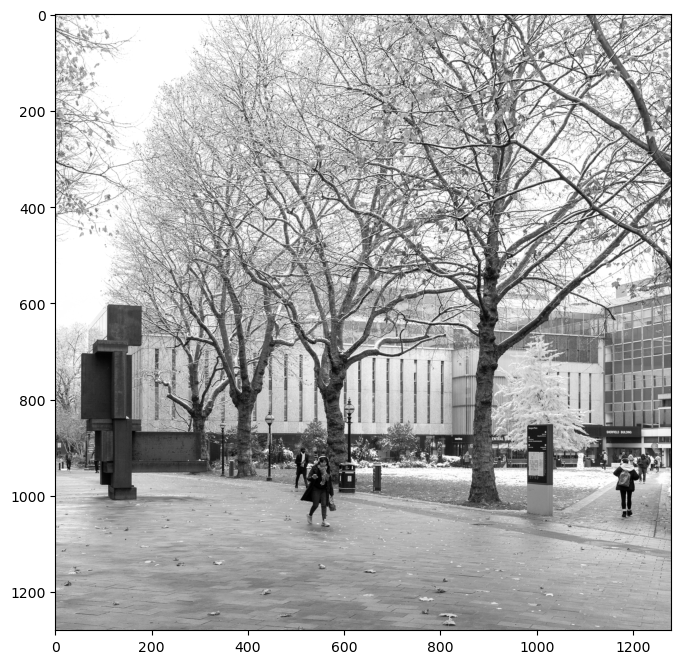

In [40]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

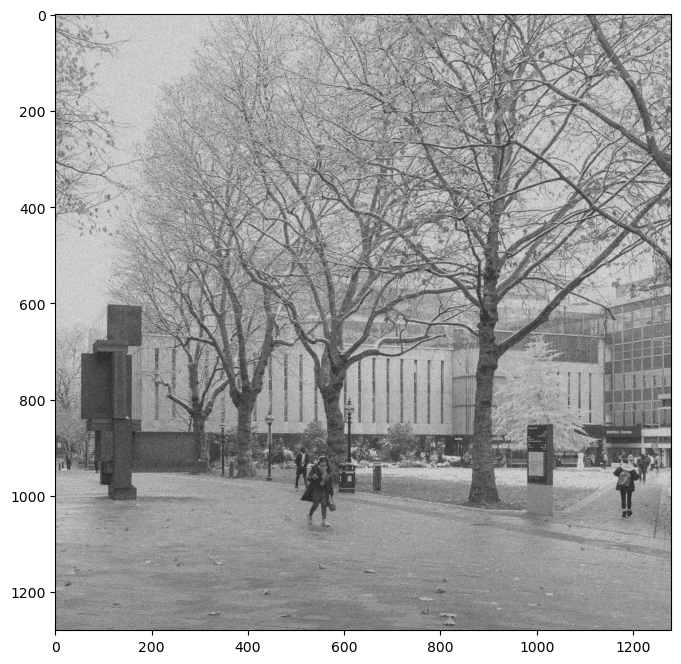

In [41]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


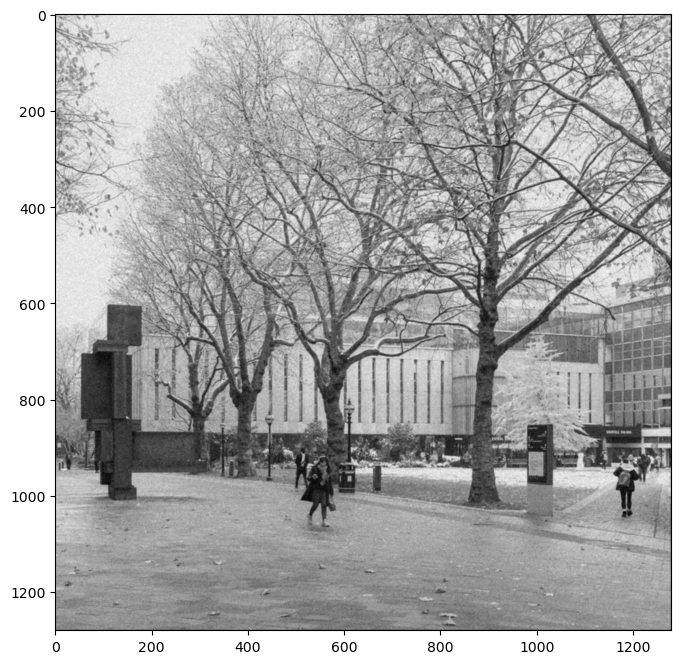

In [42]:
# Design the filter h
### Insert your code ###
h = np.ones((3, 3)) / 9

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

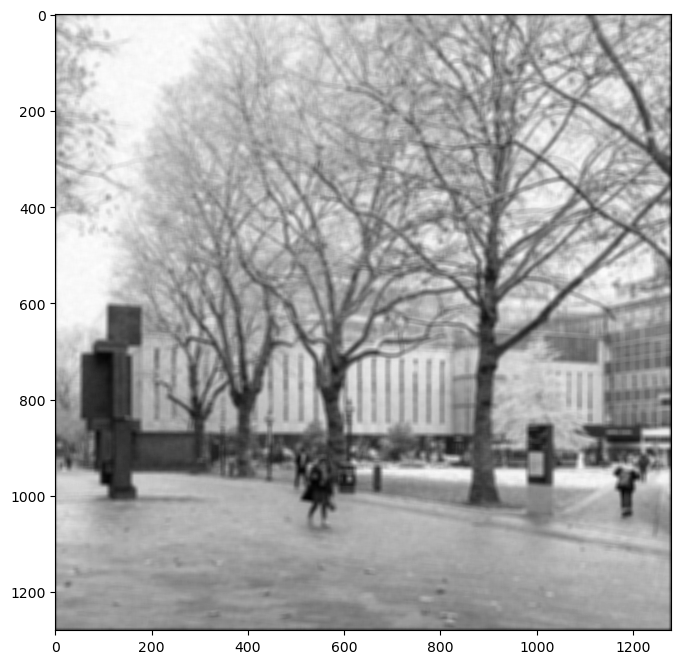

In [43]:
# Design the filter h
### Insert your code ###
h = np.ones((11, 11)) / 121

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

As the kernel size becomes larger, the smoothing effect becomes stronger. And it would be more effective in reducing noise but also result in more blurry image. So, it is a trade off between noise reduction and loss of image details.


## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


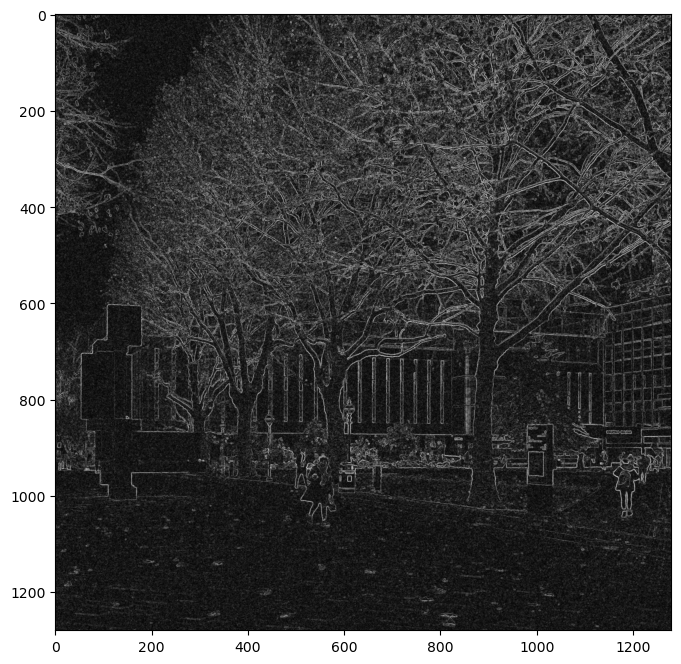

In [44]:
# Design the filters
### Insert your code ###
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Image filtering
edges_x = convolve2d(image_noisy, sobel_x, mode='same', boundary='symm')
edges_y = convolve2d(image_noisy, sobel_y, mode='same', boundary='symm')

# Calculate the gradient magnitude
grad_mag = np.sqrt(edges_x ** 2 + edges_y ** 2)

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

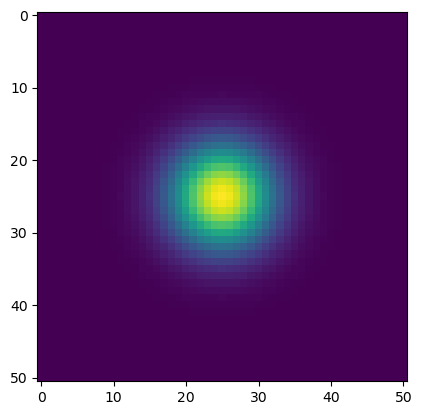

In [45]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    ### Insert your code ###
    size = 10 * sigma + 1
    h = np.zeros((size, size))
    
    for i in range(size):
        for j in range(size):
            x, y = i - size // 2, j - size // 2
            h[i, j] = math.exp((x ** 2 + y ** 2) / -(2 * sigma ** 2)) / (2 * math.pi * sigma ** 2)
    
    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

It took 16.28 seconds


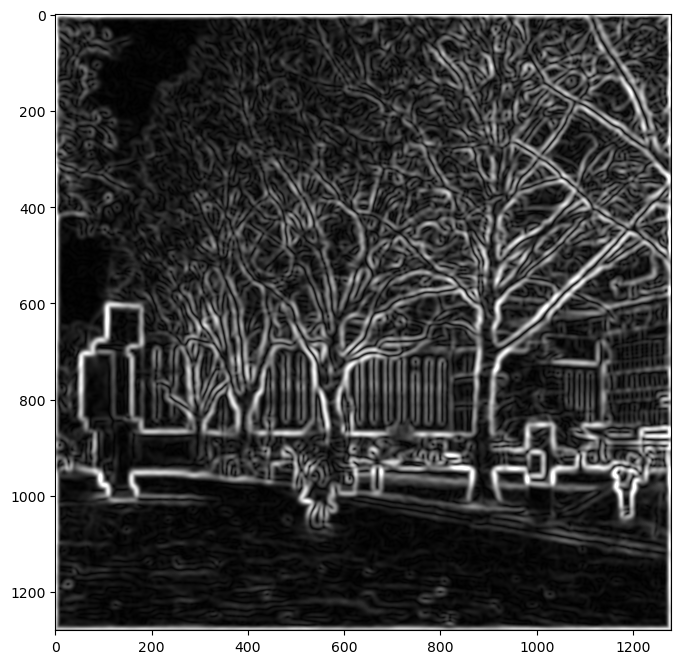

In [46]:
# Construct the Gaussian filter
sigma = 5
h = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
start = time.time()
image_gau = convolve2d(image_noisy, h, mode='same') 
end = time.time()
print(f'It took {end - start:.2f} seconds')

# Image filtering
edges_x = convolve2d(image_gau, sobel_x, mode='same', boundary='symm')
edges_y = convolve2d(image_gau, sobel_y, mode='same', boundary='symm')

# Calculate the gradient magnitude
grad_mag = np.sqrt(edges_x ** 2 + edges_y ** 2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

(1, 51)
(51, 1)


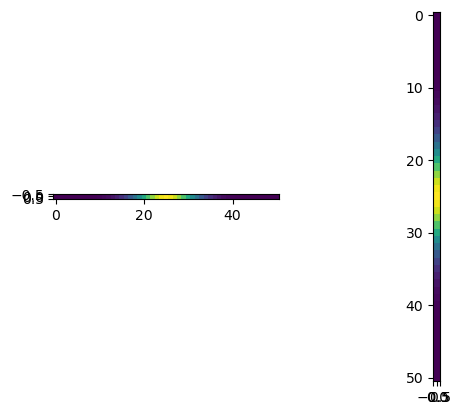

In [47]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    ### Insert your code ###
    size = 10 * sigma + 1
    h = np.zeros((size))
    
    for i in range(size):
        x = i - size // 2
        h[i] = math.exp((x ** 2) / -(2 * sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)
    
    return h

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x = np.reshape(gaussian_filter_1d(sigma), (1, -1))
print(h_x.shape)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = np.reshape(gaussian_filter_1d(sigma), (-1, 1))
print(h_y.shape)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

It took 1.32 seconds


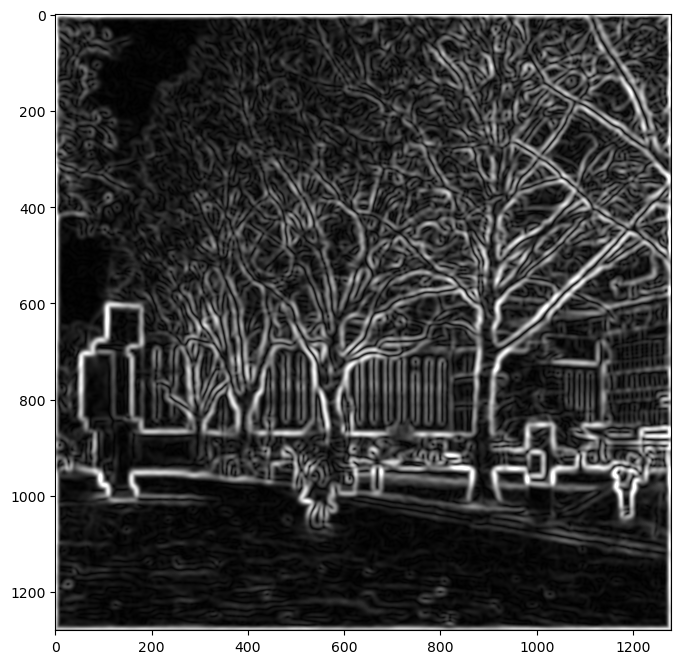

In [48]:
# Perform separable Gaussian smoothing and count time
start = time.time()
image_gau = convolve2d(image_noisy, h_x, mode='same') 
image_gau = convolve2d(image_gau, h_y, mode='same') 
end = time.time()
print(f'It took {end - start:.2f} seconds')

# Image filtering
edges_x = convolve2d(image_gau, sobel_x, mode='same', boundary='symm')
edges_y = convolve2d(image_gau, sobel_y, mode='same', boundary='symm')

# Calculate the gradient magnitude
### Insert your code ###
grad_mag2 = np.sqrt(edges_x ** 2 + edges_y ** 2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
### Insert your code ###

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

The filtering result is identical due to the nature of Gaussian filter being separable, i.e. the big 2D Gaussian filter is equivalent to the convolution of the two small 1D Gaussian filters. Note that despite it is more straightforward to directly apply the 2D Gaussian filter, using separable 1D filter is much more computationally and memory efficient, as shown in the time difference above(10.85 seconds vs 0.83 seconds).

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [49]:
# Import libaries (provided)
import torch
from torch import nn

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [50]:
def to_tensor(h):
    return torch.tensor(h.reshape((1, 1, *h.shape))).double()

# Expand the dimension of the numpy array
# Convert to a Pytorch tensor using torch.from_numpy
image_tensor = to_tensor(image_noisy)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

In [51]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
h = to_tensor(h)

# Create the Conv2D filter
conv = nn.Conv2d(1, 1, kernel_size=h.shape[2:], padding='same', bias=False)
conv.weight = nn.Parameter(h)

# Filtering
def to_numpy(t):
    return t.detach().numpy().squeeze()

image_filtered_tensor = conv(image_tensor)
image_filtered = to_numpy(image_filtered_tensor)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

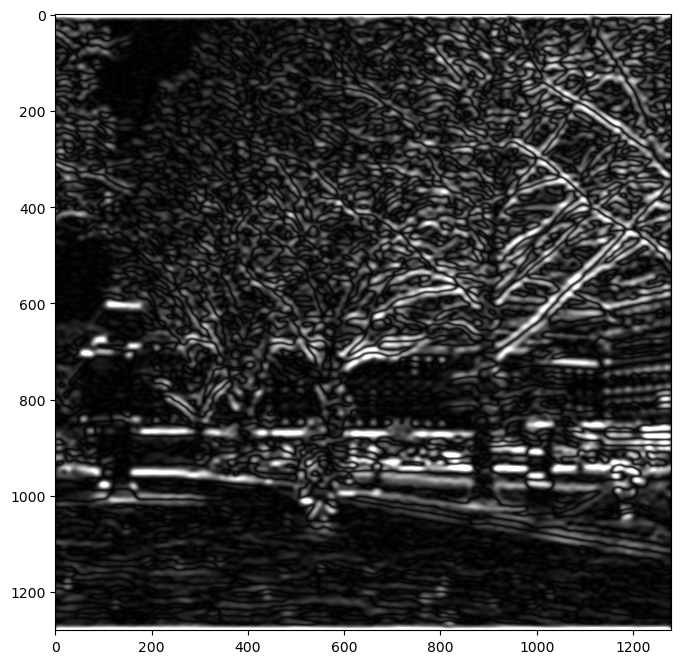

In [ ]:
# Create Conv2D filters
conv_x = nn.Conv2d(1, 1, kernel_size=(3, 3), padding='same', bias=False)
conv_x.weight = nn.Parameter(to_tensor(sobel_x))
conv_y = nn.Conv2d(1, 1, kernel_size=(3, 3), padding='same', bias=False)
conv_y.weight = nn.Parameter(to_tensor(sobel_y))

# Perform filtering
edges_x = to_numpy(conv_x(image_filtered_tensor))
edges_y = to_numpy(conv_y(image_filtered_tensor))

# Calculate the gradient magnitude map
grad_mag3 = np.sqrt(edges_x ** 2 + edges_y ** 2)

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)